# Week 06, Part 3

### Topic
 1. Geometric Distribution
 1. BACK TO SLIDES FOR BINOMIAL DISTRIBUTION FROM GEOMETRIC DISTRIBUTION


In [1]:
# resize
require(repr)
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

Loading required package: repr

Warning message:
“package ‘repr’ was built under R version 3.6.3”


## 1. Geometric Distribution

Let's simulate our coin throws again, and ask how likely is it that we get all tails for the first 5 throws and a head only on the 6th throw?

We can take a look at this:

In [2]:
nToss = 6
samples = sample(2,size=nToss, replace=TRUE)

Now, lets re-map 1$\rightarrow$0 & 2$\rightarrow$1 just for consistency w/the definitions of probability & success:

In [3]:
samples[samples==1] = 0 # tails, failures
samples[samples==2] = 1 # heads, successes
print(samples) # **run this a few times on your own**

[1] 0 1 1 1 1 0


How often to we see 5 zeros followed by a 1 at the end?

We can see that with a fair coin, it is very unlikely that we get all tails and the last of 6 is heads.

What if the coin were not fair?  
What if instead of p~0.5 we assume that the coin is weighted to tails like p=0.1? i.e. the probability of getting a heads is only 10%.

In [6]:
samples = sample(2,size=nToss, replace=TRUE, prob=c(0.9, 1-0.9)) # prob=(0=tails=FAILURE, 1=heads=SUCCESS)
samples[samples==1] = 0 # tails, failures
samples[samples==2] = 1 # heads, successes

Q: Do you think I'll see more heads (1's) or tails (0's)?

*Think on this for a minute before running.*

In [7]:
print(samples) # **run this a few times**

[1] 1 0 0 1 0 0


Now we see that it is very likely that we get all tails and no heads.

In fact, we can plot the theoretical distribution from what we know from our slides/OIS:

P(success on the nth trail, failure on n-1 trial) = $(1-p)^{(n-1)} \times p$

Let's first go back to a fair coin and set "p" to the probability of our fair coin toss:

In [8]:
p = 0.5

Let's pick a number of trials to throw our dice:

In [9]:
nToss = 10 # toss coin nToss times
prob_suc_n_an = c() # store probability of success on n

Now let's store, for each trial n, our calculated probability of getting all failures and then a success on the nth coin flip:

In [10]:
for (n in 1:nToss){
  prob_suc_n_an = c(prob_suc_n_an, (1-p)^(n-1)*p)
}

Let's make a bar plot for this:

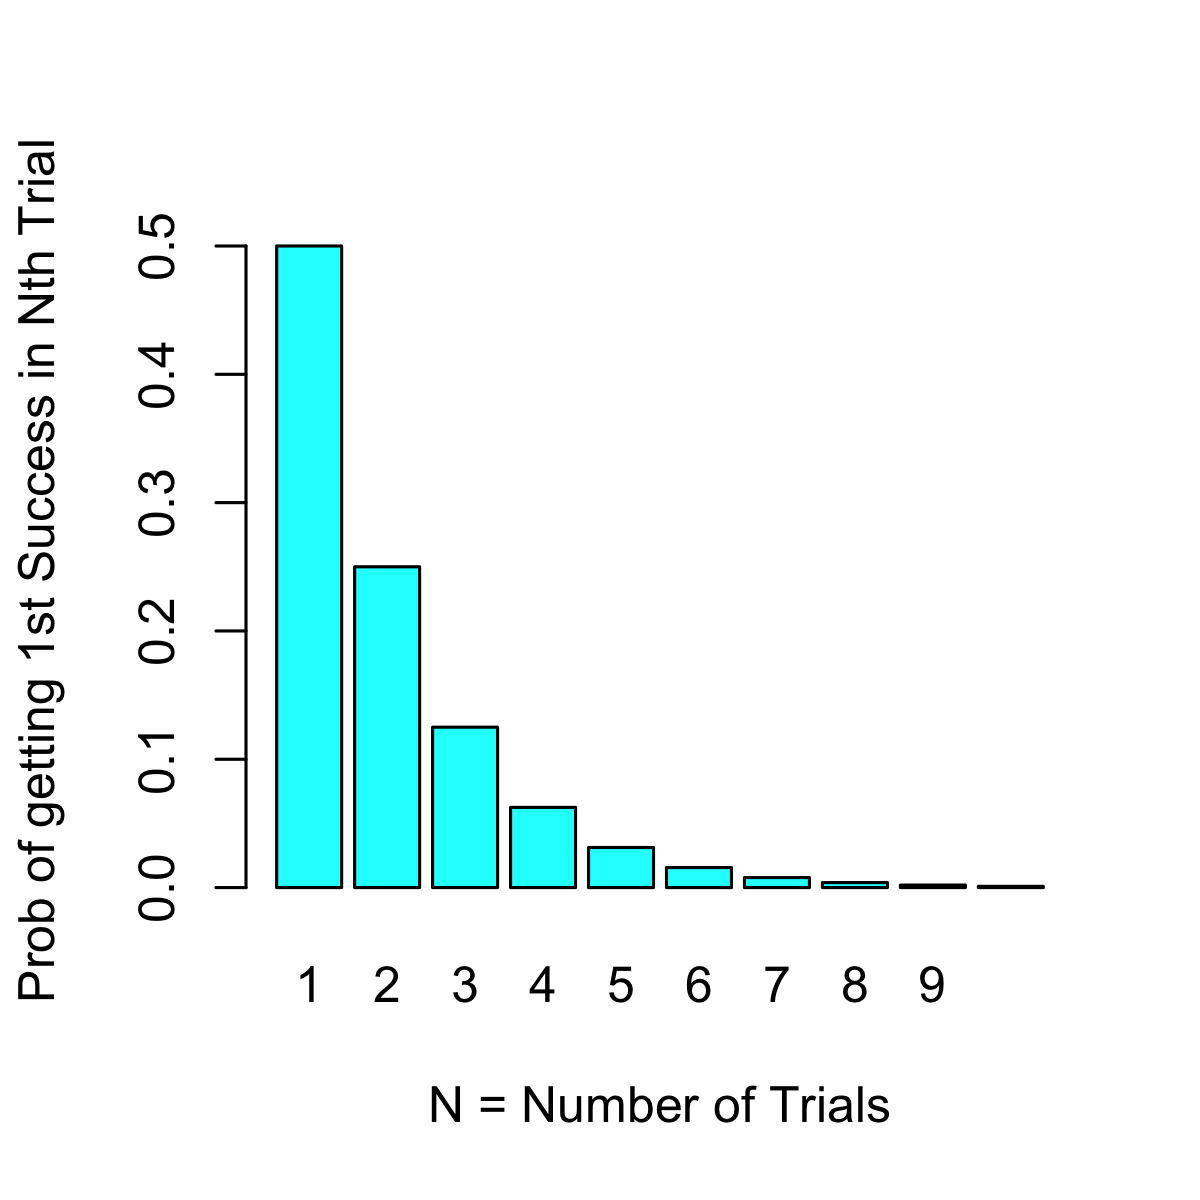

In [11]:
barplot(prob_suc_n_an, names.arg=1:nToss, col='cyan', 
        xlab = 'N = Number of Trials', 
        ylab = 'Prob of getting 1st Success in Nth Trial')

What does this tell us?

For starters, if we flip a fair coin once it has a 50% probability of being heads (success) or tails (failure).

As we continue to flip a fair coin, it gets less and less likely that we'll get all tails, and then a head.

Let's compare to another unfair coin.  First, I'll make some side-by-side plots, starting with our fair coin:

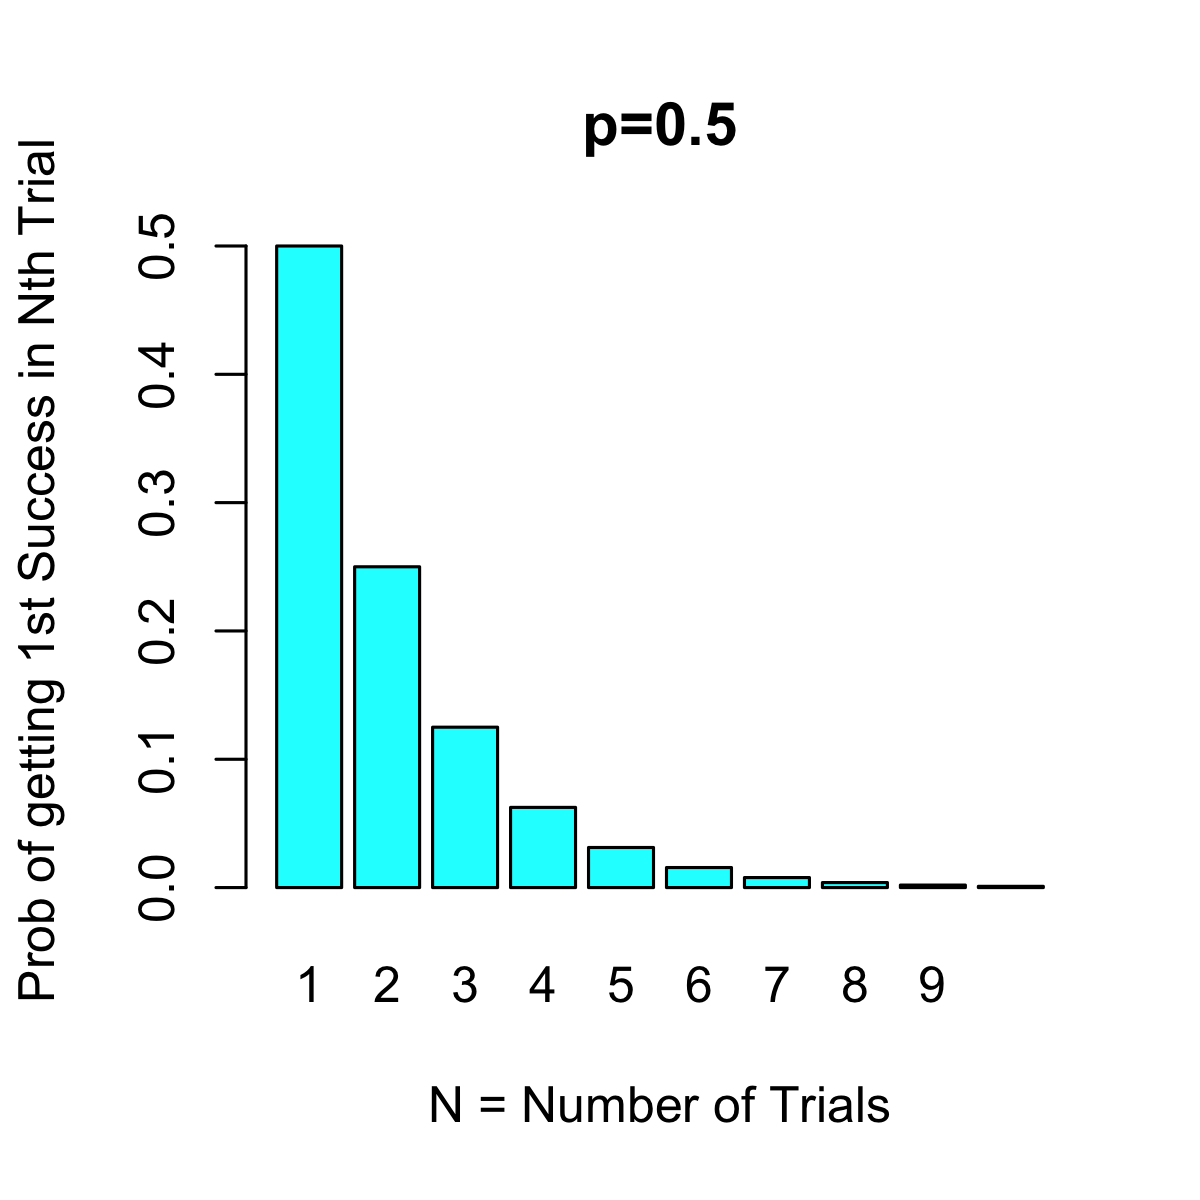

In [12]:
barplot(prob_suc_n_an, names.arg=1:nToss, col='cyan', 
        xlab = 'N = Number of Trials', 
        ylab = 'Prob of getting 1st Success in Nth Trial',
        main="p=0.5")

Now, let's assume I have an unfair coin that only gives heads 10% of the time:

In [13]:
p2 = 0.1
prob_suc_n_an2 = c()
for (n in 1:nToss){
  prob_suc_n_an2 = c(prob_suc_n_an2, (1-p2)^(n-1)*p2)
}

Plot both side-by-side:

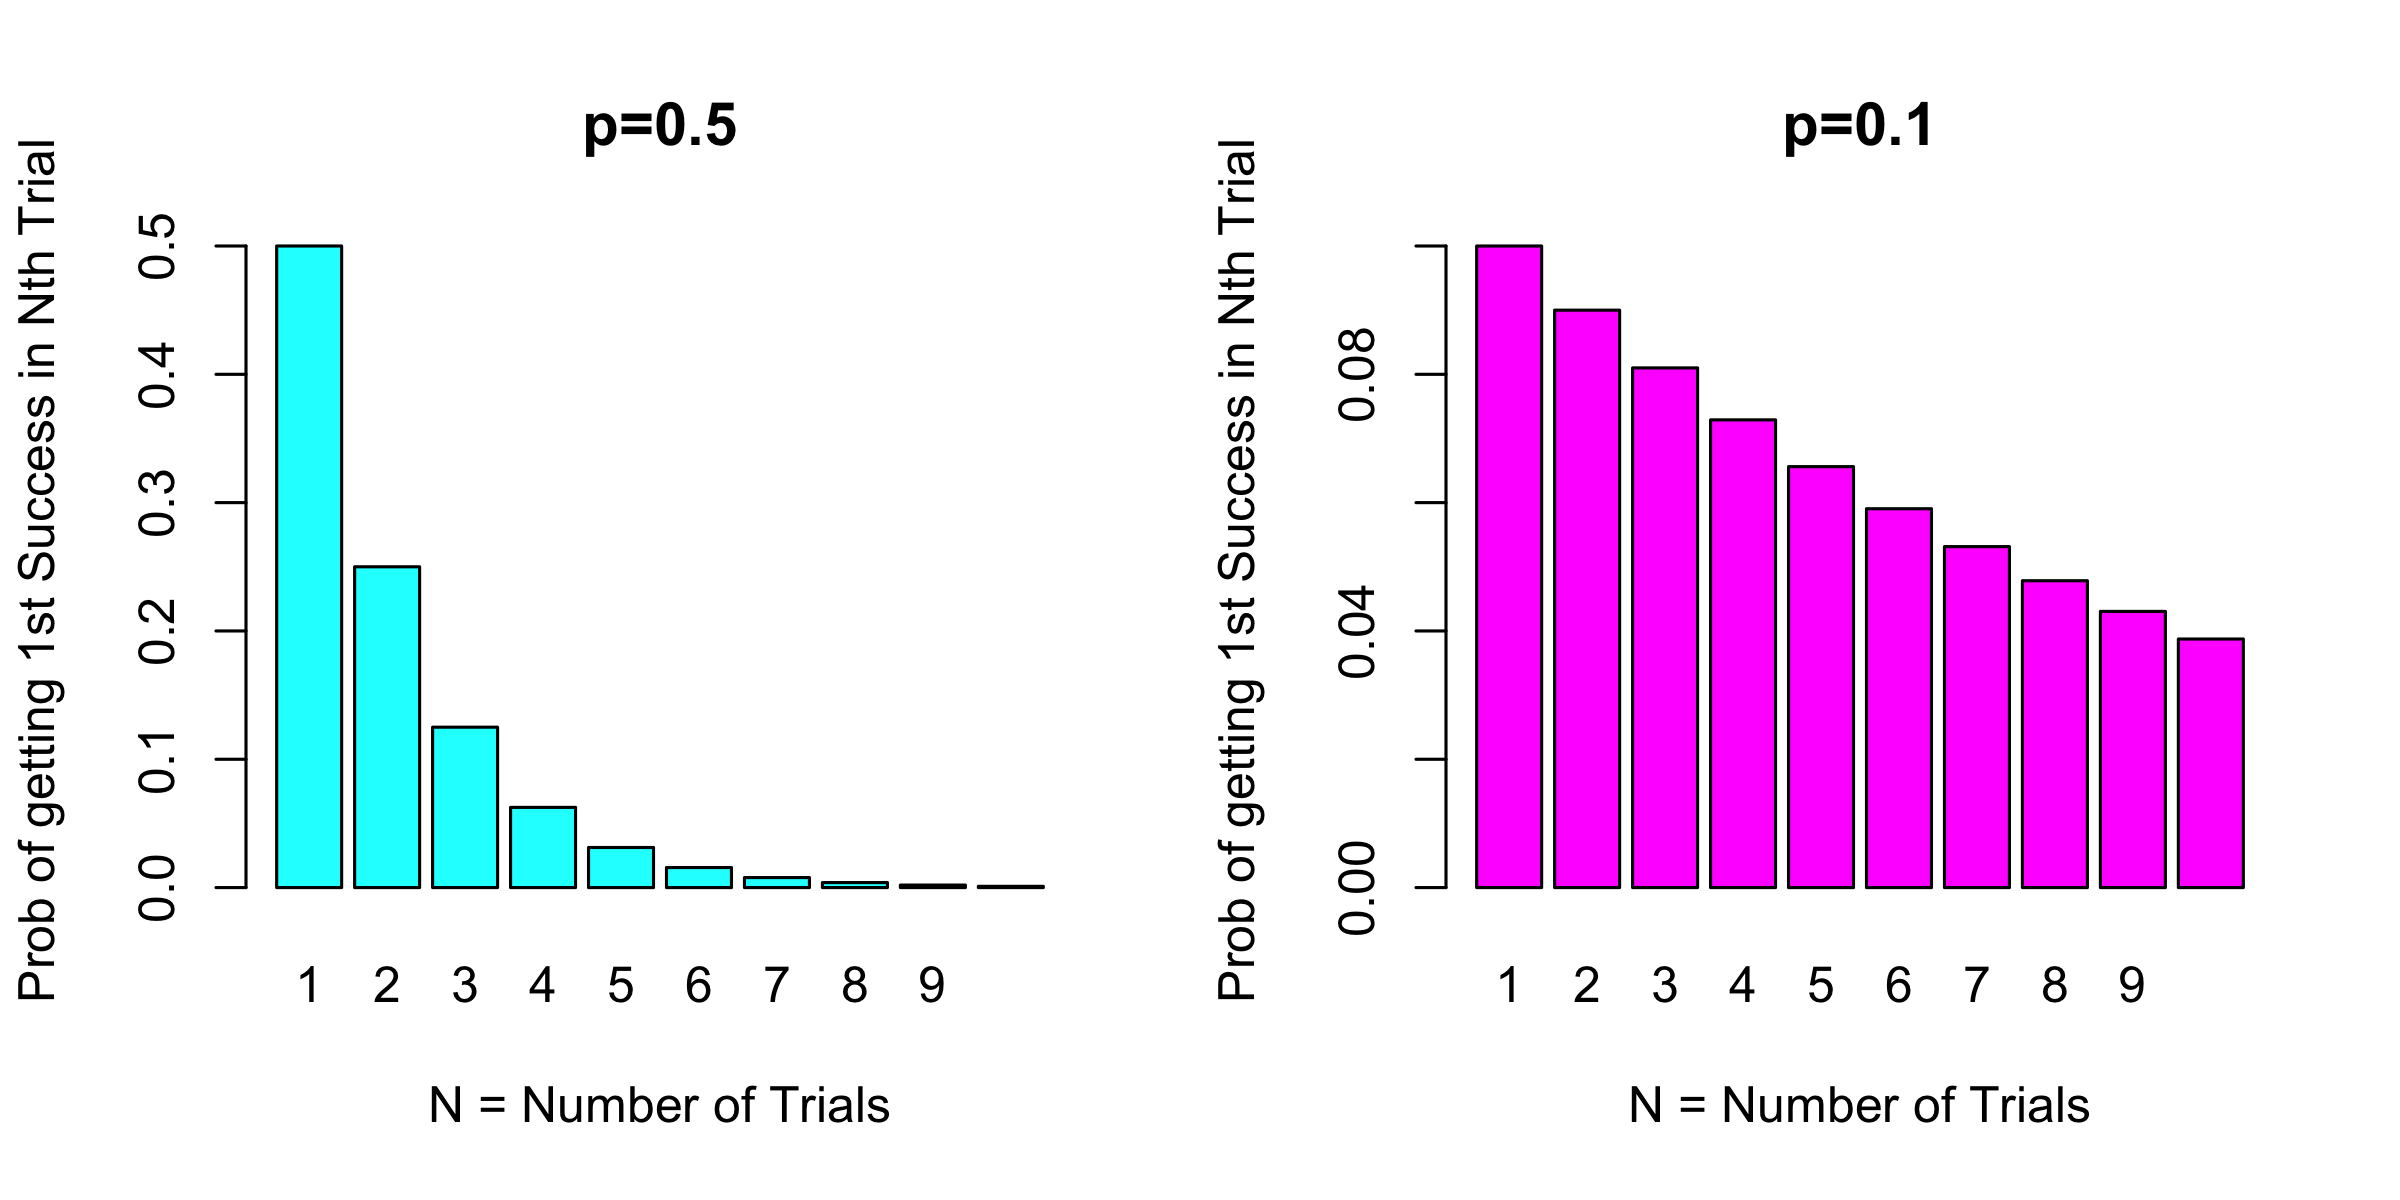

In [14]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=4)

barplot(prob_suc_n_an, names.arg=1:nToss, col='cyan', 
        xlab = 'N = Number of Trials', 
        ylab = 'Prob of getting 1st Success in Nth Trial',
        main="p=0.5")

barplot(prob_suc_n_an2, names.arg=1:nToss, col='magenta', 
        xlab = 'N = Number of Trials', 
        ylab = 'Prob of getting 1st Success in Nth Trial',
        main='p=0.1')

When we have a very unfair coin, in this case, weighted to fail, its very likely that we'll get a lot of failures before finally getting a success.

What happens, if we set p2 = 0.9? *DO THIS ON YOR OWN*

We see that if we unfairly weight our coin towards heads then we are less likely to get a string of failures before getting a success.

But what about the more general case of not just 1 success after n trials, but k successes in n trials?  Why this is in fact the **BINOMIAL DISTRIBUTION**.

# BACK TO SLIDES FOR BINOMIAL DISTRIBUTION FROM GEOMETRIC DISTRIBUTION